<a href="https://colab.research.google.com/github/RanxduG/Sri-Lanka-Formaldehyde-Level-Analysis/blob/main/Data_Engineering_with_NASA_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
from google.colab import drive

#Downloading datasets

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
col_nasa = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/NASA/Colombo_NASA_Weather_Data.csv")
kan_nasa = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/NASA/Kandy_NASA_Weather_Data.csv")
mon_nasa = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/NASA/Moneragala_NASA_Weather_Data.csv")
nuw_nasa = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/NASA/NuwaraEliye_NASA_Weather_Data.csv")
kur_nasa = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/NASA/Kurunegala_NASA_Weather_Data.csv")
mat_nasa = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/NASA/Matara_NASA_Weather_Data.csv")
jaf_nasa = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/NASA/Jaffna_NASA_Weather_Data.csv")

In [4]:
col_hcho = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/Preprocessed Data/colombo_preprocessed_data.csv")
kan_hcho = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/Preprocessed Data/kandy_preprocessed_data.csv")
mon_hcho = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/Preprocessed Data/monaragala_preprocessed_data.csv")
nuw_hcho = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/Preprocessed Data/nuwara_preprocessed_data.csv")
kur_hcho = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/Preprocessed Data/kurunegala_preprocessed_data.csv")
mat_hcho = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/Preprocessed Data/matara_preprocessed_data.csv")
jaf_hcho = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/Preprocessed Data/jaffna_preprocessed_data.csv")

In [5]:
col_nasa.head()

,YEAR,MO,DY,T2M,TS,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WD10M,WS50M,WD50M
0,2019,1,1,24.80,25.29,15.62,80.00,0.12,100.03,6.29,35.50,8.16,37.00
1,2019,1,2,24.39,25.01,15.14,79.50,0.02,100.02,5.64,33.44,7.34,35.31
2,2019,1,3,24.17,24.73,14.77,78.50,0.01,100.06,6.15,30.62,7.91,32.06
3,2019,1,4,24.04,24.57,14.47,77.62,0.00,100.01,5.64,34.25,7.43,36.19
4,2019,1,5,24.87,25.33,16.05,81.50,0.03,99.88,5.47,71.81,7.20,44.19


In [6]:
col_nasa.tail()

,YEAR,MO,DY,T2M,TS,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WD10M,WS50M,WD50M
1821,2023,12,27,27.03,27.06,19.71,87.50,3.22,99.66,5.91,28.00,7.84,29.88
1822,2023,12,28,27.16,27.19,20.26,89.06,12.37,99.60,3.70,55.75,5.02,58.44
1823,2023,12,29,27.06,27.12,19.53,86.62,7.40,99.69,2.95,45.00,3.96,49.06
1824,2023,12,30,26.55,26.61,18.92,86.44,2.63,99.69,4.93,38.00,6.59,39.94
1825,2023,12,31,26.58,26.72,18.98,86.62,24.96,99.69,4.88,32.81,6.47,35.31


In [7]:
col_hcho.head()

,HCHO reading,Location,Current Date,Next Date,month
0,0.000197,Colombo Proper,2019-01-01,2019-01-02,2019-01
1,0.000263,Colombo Proper,2019-01-02,2019-01-03,2019-01
2,0.000099,Colombo Proper,2019-01-03,2019-01-04,2019-01
3,0.000210,Colombo Proper,2019-01-04,2019-01-05,2019-01
4,0.000179,Colombo Proper,2019-01-05,2019-01-06,2019-01


In [8]:
col_hcho.tail()

,HCHO reading,Location,Current Date,Next Date,month
1821,0.000118,Colombo Proper,2023-12-27,2023-12-28,2023-12
1822,0.000178,Colombo Proper,2023-12-28,2023-12-29,2023-12
1823,0.000178,Colombo Proper,2023-12-29,2023-12-30,2023-12
1824,0.000140,Colombo Proper,2023-12-30,2023-12-31,2023-12
1825,0.000080,Colombo Proper,2023-12-31,2024-01-01,2023-12


In [9]:
def make_data_column(df):
    # Rename columns to match pd.to_datetime() requirements
    df.rename(columns={'YEAR': 'year', 'MO': 'month', 'DY': 'day'}, inplace=True)

    # Combine columns into a single 'date' column
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

    # Drop the original columns
    df.drop(columns=['year', 'month', 'day'], inplace=True)

    return df

In [10]:
col_nasa =  make_data_column(col_nasa)

In [11]:
col_nasa.head()

,T2M,TS,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WD10M,WS50M,WD50M,date
0,24.80,25.29,15.62,80.00,0.12,100.03,6.29,35.50,8.16,37.00,2019-01-01
1,24.39,25.01,15.14,79.50,0.02,100.02,5.64,33.44,7.34,35.31,2019-01-02
2,24.17,24.73,14.77,78.50,0.01,100.06,6.15,30.62,7.91,32.06,2019-01-03
3,24.04,24.57,14.47,77.62,0.00,100.01,5.64,34.25,7.43,36.19,2019-01-04
4,24.87,25.33,16.05,81.50,0.03,99.88,5.47,71.81,7.20,44.19,2019-01-05


In [12]:
null_counts = col_nasa.isnull().sum()

# Print the counts of null values in each column
print(null_counts)

T2M            0
TS             0
QV2M           0
RH2M           0
PRECTOTCORR    0
PS             0
WS10M          0
WD10M          0
WS50M          0
WD50M          0
date           0
dtype: int64


In [13]:
kan_nasa =  make_data_column(kan_nasa)
mon_nasa =  make_data_column(mon_nasa)
nuw_nasa =  make_data_column(nuw_nasa)
kur_nasa =  make_data_column(kur_nasa)
mat_nasa =  make_data_column(mat_nasa)
jaf_nasa =  make_data_column(jaf_nasa)

In [14]:
def join_Temp_data(df, nasa_df, how, column):
  df['Current Date'] = pd.to_datetime(df['Current Date'])
  # Perform left join with Temp_df as the left DataFrame
  joined_data = nasa_df.merge(
      df,
      left_on=column,
      right_on='Current Date',
      how=how
  )

  return joined_data


In [15]:
colombo_joined = join_Temp_data(col_hcho, col_nasa, 'inner', 'date')

In [16]:
colombo_joined.head()

,T2M,TS,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WD10M,WS50M,WD50M,date,HCHO reading,Location,Current Date,Next Date,month
0,24.80,25.29,15.62,80.00,0.12,100.03,6.29,35.50,8.16,37.00,2019-01-01,0.000197,Colombo Proper,2019-01-01,2019-01-02,2019-01
1,24.39,25.01,15.14,79.50,0.02,100.02,5.64,33.44,7.34,35.31,2019-01-02,0.000263,Colombo Proper,2019-01-02,2019-01-03,2019-01
2,24.17,24.73,14.77,78.50,0.01,100.06,6.15,30.62,7.91,32.06,2019-01-03,0.000099,Colombo Proper,2019-01-03,2019-01-04,2019-01
3,24.04,24.57,14.47,77.62,0.00,100.01,5.64,34.25,7.43,36.19,2019-01-04,0.000210,Colombo Proper,2019-01-04,2019-01-05,2019-01
4,24.87,25.33,16.05,81.50,0.03,99.88,5.47,71.81,7.20,44.19,2019-01-05,0.000179,Colombo Proper,2019-01-05,2019-01-06,2019-01


In [17]:
colombo_joined.tail()

,T2M,TS,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WD10M,WS50M,WD50M,date,HCHO reading,Location,Current Date,Next Date,month
1821,27.03,27.06,19.71,87.50,3.22,99.66,5.91,28.00,7.84,29.88,2023-12-27,0.000118,Colombo Proper,2023-12-27,2023-12-28,2023-12
1822,27.16,27.19,20.26,89.06,12.37,99.60,3.70,55.75,5.02,58.44,2023-12-28,0.000178,Colombo Proper,2023-12-28,2023-12-29,2023-12
1823,27.06,27.12,19.53,86.62,7.40,99.69,2.95,45.00,3.96,49.06,2023-12-29,0.000178,Colombo Proper,2023-12-29,2023-12-30,2023-12
1824,26.55,26.61,18.92,86.44,2.63,99.69,4.93,38.00,6.59,39.94,2023-12-30,0.000140,Colombo Proper,2023-12-30,2023-12-31,2023-12
1825,26.58,26.72,18.98,86.62,24.96,99.69,4.88,32.81,6.47,35.31,2023-12-31,0.000080,Colombo Proper,2023-12-31,2024-01-01,2023-12


In [18]:
null_counts = colombo_joined.isnull().sum()

# Print the counts of null values in each column
print(null_counts)

T2M             0
TS              0
QV2M            0
RH2M            0
PRECTOTCORR     0
PS              0
WS10M           0
WD10M           0
WS50M           0
WD50M           0
date            0
HCHO reading    0
Location        0
Current Date    0
Next Date       0
month           0
dtype: int64


In [19]:
kandy_joined = join_Temp_data(kan_hcho, kan_nasa, 'inner', 'date')
matara_joined = join_Temp_data(mat_hcho, mat_nasa, 'inner', 'date')
kurunegala_joined = join_Temp_data(kur_hcho, kur_nasa, 'inner', 'date')
nuwara_joined = join_Temp_data(nuw_hcho, nuw_nasa, 'inner', 'date')
monaragala_joined = join_Temp_data(mon_hcho, mon_nasa, 'inner', 'date')
jaffna_joined = join_Temp_data(jaf_hcho, jaf_nasa, 'inner', 'date')


In [20]:
colombo_joined

,T2M,TS,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WD10M,WS50M,WD50M,date,HCHO reading,Location,Current Date,Next Date,month
0,24.80,25.29,15.62,80.00,0.12,100.03,6.29,35.50,8.16,37.00,2019-01-01,0.000197,Colombo Proper,2019-01-01,2019-01-02,2019-01
1,24.39,25.01,15.14,79.50,0.02,100.02,5.64,33.44,7.34,35.31,2019-01-02,0.000263,Colombo Proper,2019-01-02,2019-01-03,2019-01
2,24.17,24.73,14.77,78.50,0.01,100.06,6.15,30.62,7.91,32.06,2019-01-03,0.000099,Colombo Proper,2019-01-03,2019-01-04,2019-01
3,24.04,24.57,14.47,77.62,0.00,100.01,5.64,34.25,7.43,36.19,2019-01-04,0.000210,Colombo Proper,2019-01-04,2019-01-05,2019-01
4,24.87,25.33,16.05,81.50,0.03,99.88,5.47,71.81,7.20,44.19,2019-01-05,0.000179,Colombo Proper,2019-01-05,2019-01-06,2019-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,27.03,27.06,19.71,87.50,3.22,99.66,5.91,28.00,7.84,29.88,2023-12-27,0.000118,Colombo Proper,2023-12-27,2023-12-28,2023-12
1822,27.16,27.19,20.26,89.06,12.37,99.60,3.70,55.75,5.02,58.44,2023-12-28,0.000178,Colombo Proper,2023-12-28,2023-12-29,2023-12
1823,27.06,27.12,19.53,86.62,7.40,99.69,2.95,45.00,3.96,49.06,2023-12-29,0.000178,Colombo Proper,2023-12-29,2023-12-30,2023-12
1824,26.55,26.61,18.92,86.44,2.63,99.69,4.93,38.00,6.59,39.94,2023-12-30,0.000140,Colombo Proper,2023-12-30,2023-12-31,2023-12


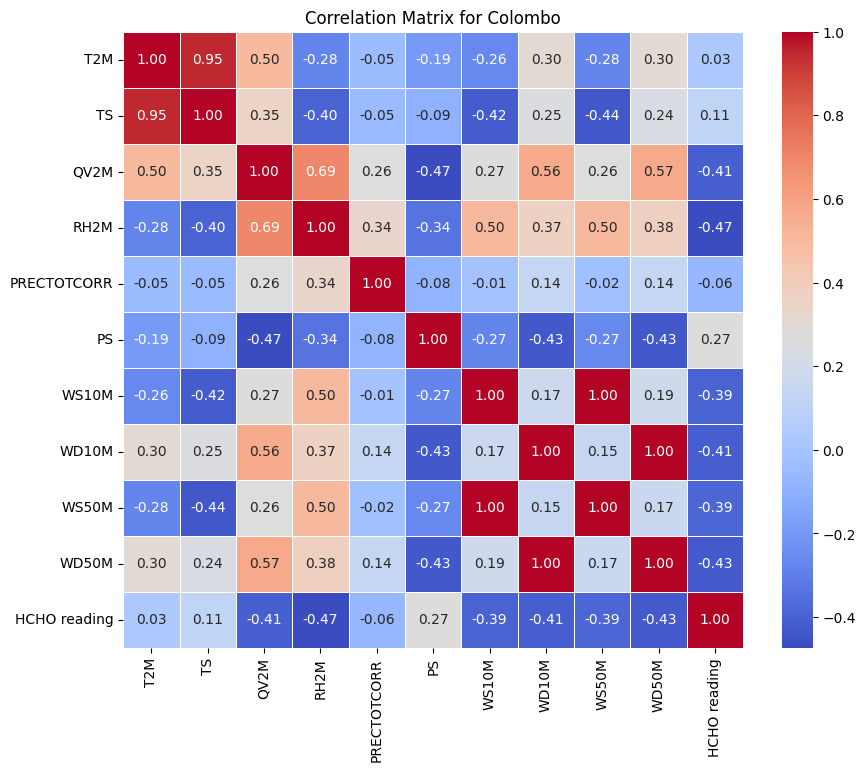

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

def print_correlation_matrix(df, name):
    columns_to_remove = ['date', 'Location', 'Current Date', 'Next Date', 'month']

    # Remove the specified columns
    df_filtered = df.drop(columns_to_remove, axis=1)

    # Compute the correlation matrix
    correlation_matrix = df_filtered.corr()

    # Plot the correlation matrix using Seaborn
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title(f"Correlation Matrix for {name}")
    plt.show()

# Call the function with the DataFrame Colombo_Data_full
print_correlation_matrix(colombo_joined, 'Colombo')

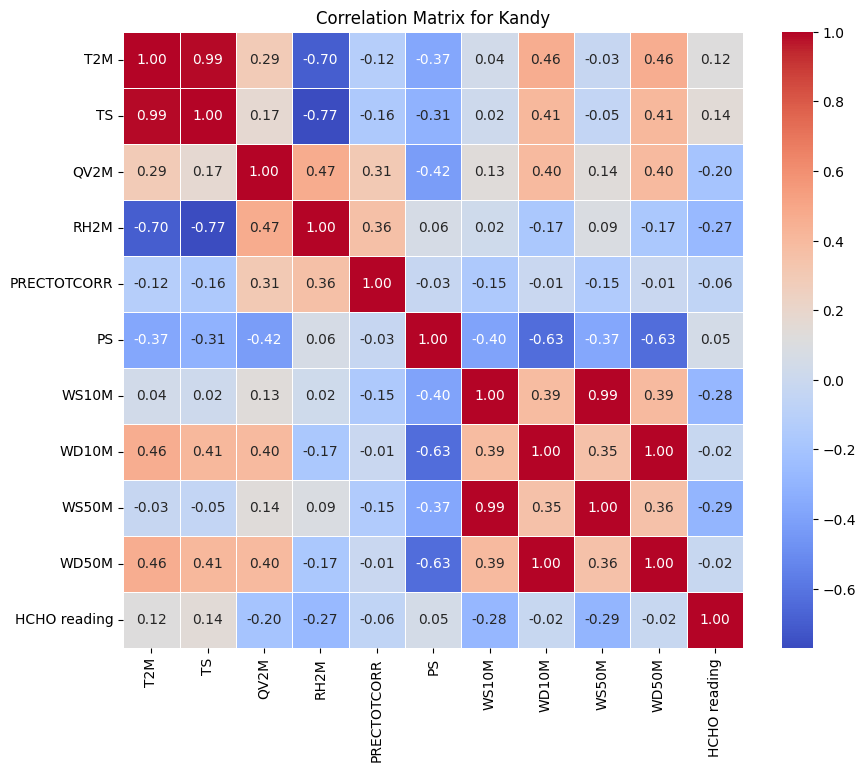

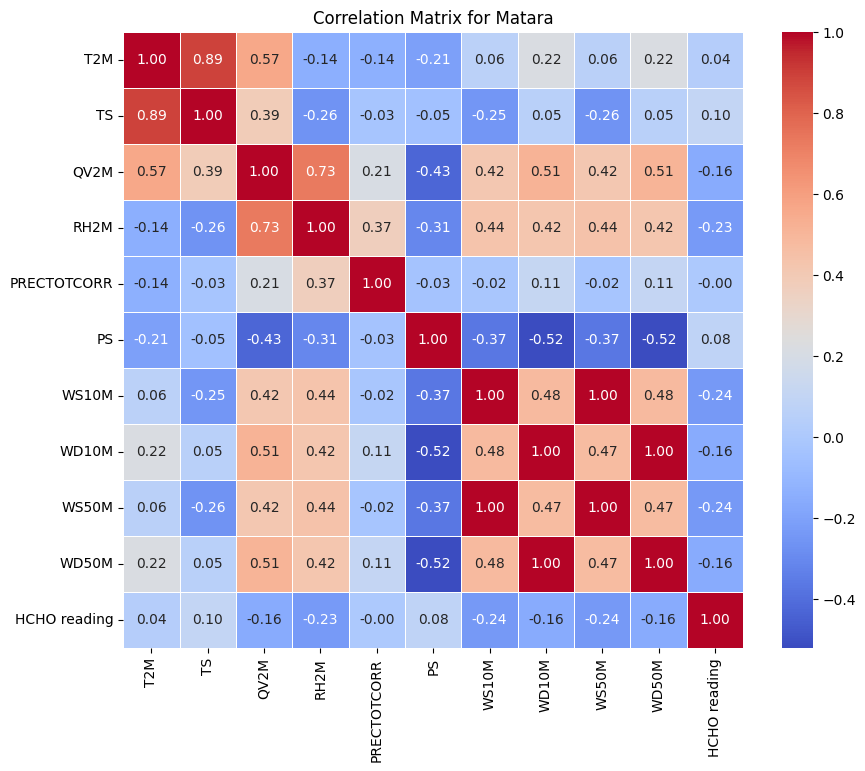

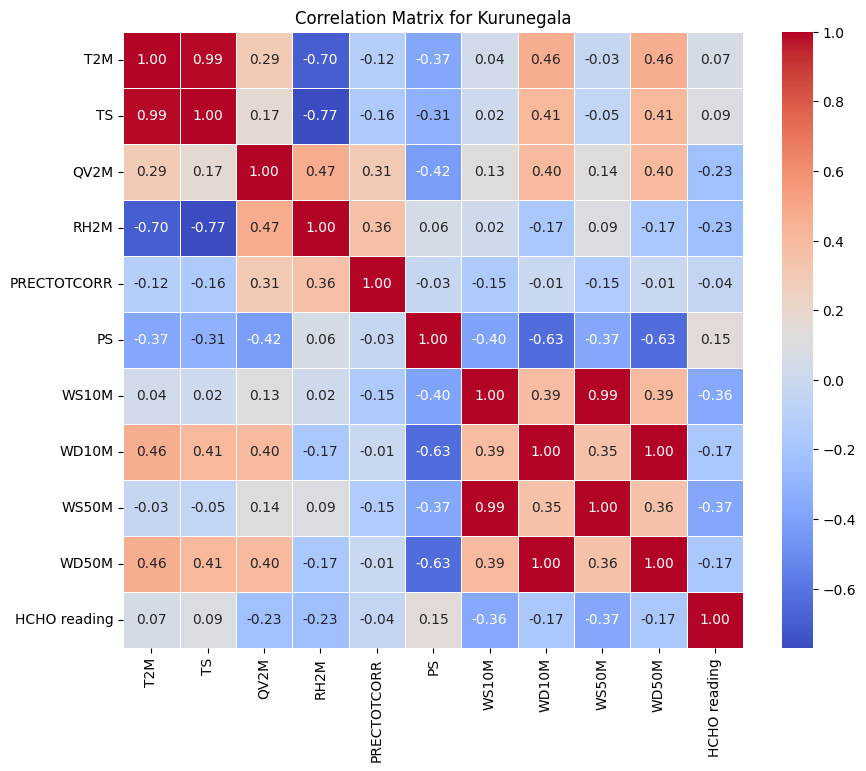

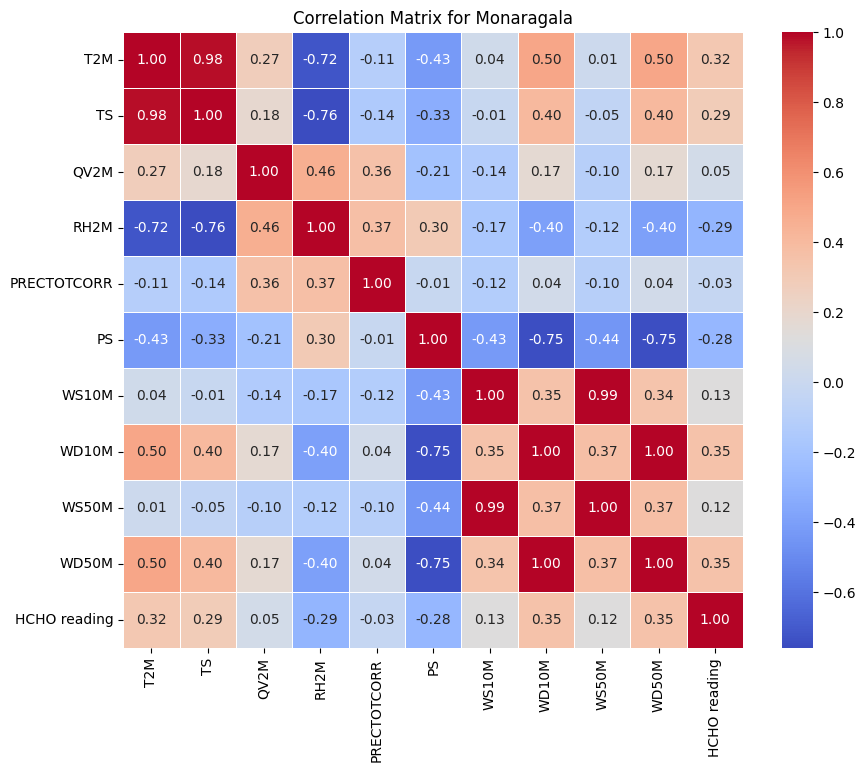

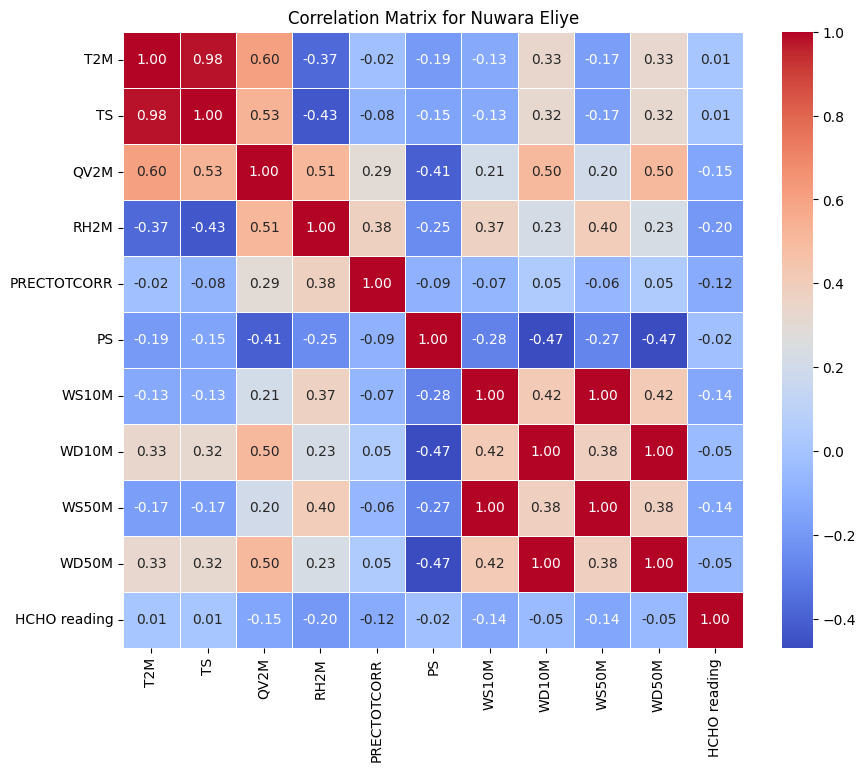

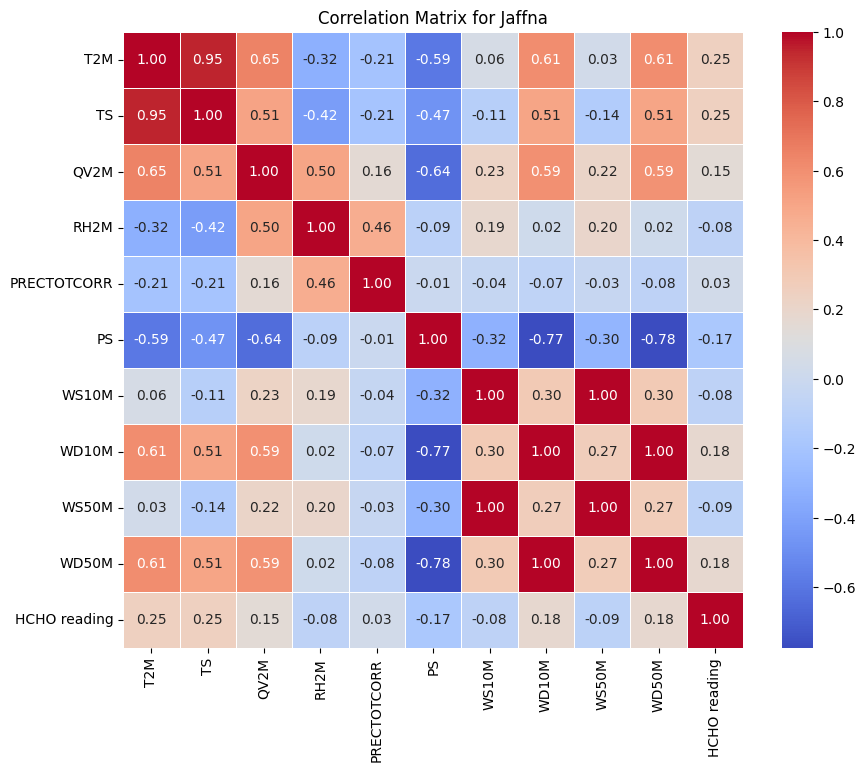

In [22]:
print_correlation_matrix(kandy_joined, 'Kandy')
print_correlation_matrix(matara_joined, 'Matara')
print_correlation_matrix(kurunegala_joined, 'Kurunegala')
print_correlation_matrix(monaragala_joined, 'Monaragala')
print_correlation_matrix(nuwara_joined, 'Nuwara Eliye')
print_correlation_matrix(jaffna_joined, 'Jaffna')
